<a name='2'></a>

**Simple RNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
max_features = 20000
sequence_length = 200

(train_data, train_labels), (val_data, val_labels) = keras.datasets.imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, maxlen=sequence_length)
val_data = pad_sequences(val_data, maxlen=sequence_length)

Here is the overview of the Keras SimpleRNN layer. We will have a high level understandingof its some important arguments.

```

tf.keras.layers.SimpleRNN(
    units,
    activation="tanh",
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False
)
```

* **units**: A positive integer that denotes the dimension of the output.

* **activation**: The activation function to use. The default activation function is `tanh`.

* **dropout**: A float between 0 and 1 denoting the percentage of units or neurons to drop for the linear transformation of the input.

* **recurrent_dropout**: A float between 0 and 1 denoting the percentage of units or neurons to drop for the linear transformation of the recurrent state.

* **return_state**: True or False. Denotes whether to return the last state in addition to the output.

* **go_backwards**: True or False. Denotes whether to process the input sequence backwards and return the reversed sequence.

That's a few notes about the important parameters. For more about the SimpleRNN layer, there is a well documented help at [keras.io](https://keras.io/api/layers/recurrent_layers/simple_rnn/).


In [ ]:
simple_rnn = tf.keras.Sequential([

  # Add an embedding layer to convert input tokens into a feature vector
  tf.keras.layers.Embedding(input_dim=max_features, output_dim=32, input_length=sequence_length),
  tf.keras.layers.SimpleRNN(32, return_sequences=True),
  tf.keras.layers.SimpleRNN(16, return_sequences=True),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model

simple_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
# Training the model

history = simple_rnn.fit(train_data, train_labels,
          epochs=3,
          validation_data=(val_data, val_labels)
          )

Epoch 1/3
782/782 [==============================] - 486s 618ms/step - loss: 0.6143 - accuracy: 0.6478 - val_loss: 0.5477 - val_accuracy: 0.7082
Epoch 2/3
782/782 [==============================] - 483s 617ms/step - loss: 0.5089 - accuracy: 0.7352 - val_loss: 0.5863 - val_accuracy: 0.6944
Epoch 3/3
782/782 [==============================] - 481s 615ms/step - loss: 0.6491 - accuracy: 0.6101 - val_loss: 0.6275 - val_accuracy: 0.6383


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

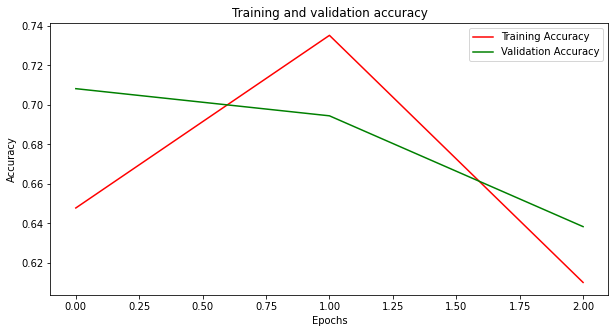

<Figure size 432x288 with 0 Axes>

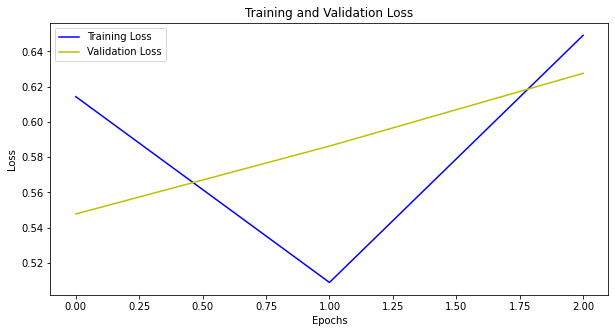

In [ ]:
plot_acc_loss(history)

The downside of RNNs is that they fail to process the long term sequences because their of limited memory. Due to having short term memory, the context will diminish over many time steps.

In order to handle long term dependencies, another version of RNN called LSTMs were introduced. Because LSTMs perform really well on sequence datasets, Simple RNNs are longer used.

<a name='3'></a>

Long Short Term Memory(LSTM)

In the development of LTSMs, we are going to use `ag_news_subset` dataset that is available in [TensorFlow datasets](https://www.tensorflow.org/datasets/catalog/ag_news_subset). AG is a collection of more than 1 million news articles gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity.

The AG dataset contains 4 classes that are: World(0), Sports(1), Business(2), Sci/Tech(3). The total number of training samples is 120,000 and testing 7,600. Each class contains 30,000 training samples and 1,900 testing samples.

You can learn more about the dataset [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [ ]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=['train', 'test'],
                                         with_info=True,
                                         as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteMVJXV1/ag_news_subset-train.tfrecord


  0%|          | 0/120000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteMVJXV1/ag_news_subset-test.tfrecord


  0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    version=1.0.0,
    description='AG is a collection of more than 1 million news articles.
News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
ComeToMyHead is an academic news search engine which has been running since July, 2004.
The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
information retrieval (ranking, search, etc), xml, data compression, data streaming,
and any other non-commercial activity.
For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
It is used as a text classification benchmark in the following paper:
Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advanc

In [ ]:
# Displaying the classes

class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print(f'The news are grouped into {num_classes} classes that are :{class_names}')

The news are grouped into 4 classes that are :['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
num_train = info.splits['train'].num_examples
num_val = info.splits['test'].num_examples

print(f'The number of training samples: {num_train} \nThe number of validation samples: {num_val}')

The number of training samples: 120000 
The number of validation samples: 7600


In [ ]:
news_df = tfds.as_dataframe(train_data.take(10), info)

news_df.head(10)

,description,label
0,b'AMD #39;s new dual-core Opteron chip is desi...,3
1,b'Reuters - Major League Baseball\\Monday anno...,1
2,b'President Bush #39;s quot;revenue-neutral q...,2
3,b'Britain will run out of leading scientists u...,3
4,"b'London, England (Sports Network) - England m...",1
5,b'TOKYO - Sony Corp. is banking on the \\$3 bi...,0
6,b'Giant pandas may well prefer bamboo to lapto...,3
7,"b'VILNIUS, Lithuania - Lithuania #39;s main pa...",0
8,b'Witnesses in the trial of a US soldier charg...,0
9,"b'Dan Olsen of Ponte Vedra Beach, Fla., shot a...",1


In [ ]:
for i in range (0,4):

  print(f"Sample news {i}\n \
  Label: {news_df['label'][i]} {(class_names[i])}\n \
  Description: {news_df['description'][i]}\n----------\n")

Sample news 0
   Label: 3 World
   Description: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
----------

Sample news 1
   Label: 1 Sports
   Description: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
----------

Sample news 2
   Label: 2 Business
   Description: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
----------

Sample news 3
   Label: 3 Sci/Tech
   Description: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'
----------



In [ ]:
news_df.columns

Index(['description', 'label'], dtype='object')

In [ ]:
buffer_size = 1000
batch_size = 32

train_data = train_data.shuffle(buffer_size)
train_data = train_data.batch(batch_size).prefetch(1)
val_data = val_data.batch(batch_size).prefetch(1)

In [ ]:
for news, label in train_data.take(1):

  print(f'Sample news\n----\n {news.numpy()[:4]} \n----\nCorresponding labels: {label.numpy()[:4]}')

Sample news
----
 [b'Macs still have fewer bugs than Windows PCs, but Apple moves to plug security holes before problems crop up.'
 b'Mexican stocks fell early Monday, dragged lower by cement giant Cemex (CX) after it announced a multibillion dollar acquisition of a British company, the largest by a Mexican firm ever.'
 b'The update for the e-mail program focuses mainly on security enhancements and adds a feature dubbed ScamWatch, which aims to combat "phishing" on the Internet.'
 b'Eight eBay sellers were ordered to pay nearly \\$90,000 (euro 70,000) in restitution and fines after admitting they bid up products online to inflate the prices.'] 
----
Corresponding labels: [3 2 3 2]


In [ ]:
max_features = 20000

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features)

In [ ]:
text_vectorizer.adapt(train_data.map(lambda description, label : description))

In [ ]:
vocab = text_vectorizer.get_vocabulary()
vocab[:10]

['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for']

In [ ]:
sample_news = ['This weekend there is a sport match between Man U and Fc Barcelona',
               'Tesla has unveiled its humanoid robot that appeared dancing during the show!']



In [ ]:
vectorized_news = text_vectorizer(sample_news)
vectorized_news.numpy()

array([[   40,   491,   185,    16,     3,  1559,   560,   163,   362,
        13418,     7,  7381,  2517],
       [    1,    20,   878,    14,     1,  4663,    10,  1249, 11657,
          159,     2,   541,     0]])

In [ ]:
input_dim = len(text_vectorizer.get_vocabulary())
input_dim

20000

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data,
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 237s 42ms/step - loss: 0.3305 - accuracy: 0.8843 - val_loss: 0.2703 - val_accuracy: 0.9075
Epoch 2/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.2021 - accuracy: 0.9300 - val_loss: 0.3008 - val_accuracy: 0.9061
Epoch 3/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.1333 - accuracy: 0.9527 - val_loss: 0.3692 - val_accuracy: 0.9036
Epoch 4/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.0812 - accuracy: 0.9704 - val_loss: 0.4574 - val_accuracy: 0.9032
Epoch 5/5
3750/3750 [==============================] - 157s 42ms/step - loss: 0.0506 - accuracy: 0.9817 - val_loss: 0.5542 - val_accuracy: 0.8955


In [ ]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

238/238 [==============================] - 4s 18ms/step - loss: 0.5542 - accuracy: 0.8955
Loss on validation data: 0.5541531443595886
 Accuracy on Validation data: 0.8955262899398804


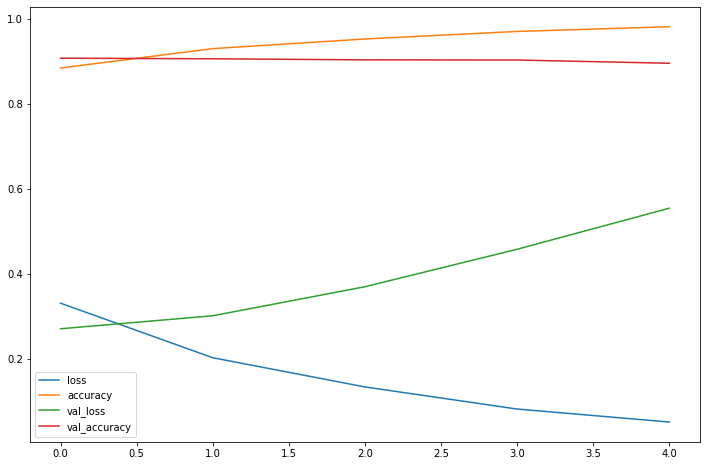

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data,
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 334s 73ms/step - loss: 0.4098 - accuracy: 0.8626 - val_loss: 0.2883 - val_accuracy: 0.9051
Epoch 2/5
3750/3750 [==============================] - 271s 72ms/step - loss: 0.2557 - accuracy: 0.9201 - val_loss: 0.2944 - val_accuracy: 0.9038
Epoch 3/5
3750/3750 [==============================] - 269s 72ms/step - loss: 0.1988 - accuracy: 0.9360 - val_loss: 0.3246 - val_accuracy: 0.9022
Epoch 4/5
3750/3750 [==============================] - 268s 72ms/step - loss: 0.1455 - accuracy: 0.9522 - val_loss: 0.4522 - val_accuracy: 0.8974
Epoch 5/5
3750/3750 [==============================] - 272s 72ms/step - loss: 0.1078 - accuracy: 0.9641 - val_loss: 0.4931 - val_accuracy: 0.8974


In [ ]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

238/238 [==============================] - 7s 27ms/step - loss: 0.4931 - accuracy: 0.8974
Loss on validation data: 0.49308159947395325
 Accuracy on Validation data: 0.8973684310913086


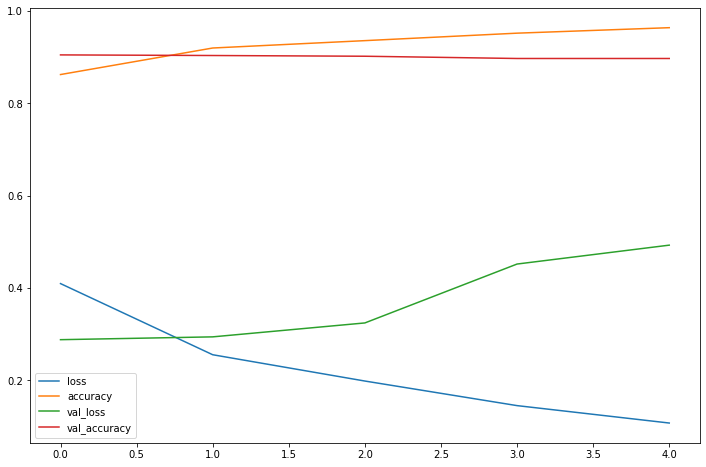

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [ ]:
# Predicting the class of new news

sample_news = ['The self driving car company Tesla has unveiled its humanoid robot that appeared dancing during the show!']

sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


predicted class: 3 
Predicted Class name: Sci/Tech


In [ ]:
# Predicting the class of new news

sample_news = ['This weekend there is a match between two big footbal teams in the national league']
sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


predicted class: 1 
Predicted Class name: Sports


<a name='4-6'></a>

 Gate Recurrent Unit(GRU)

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),
    tf.keras.layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data,
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 697s 185ms/step - loss: 0.3557 - accuracy: 0.8750 - val_loss: 0.2788 - val_accuracy: 0.9051
Epoch 2/5
3750/3750 [==============================] - 692s 184ms/step - loss: 0.2300 - accuracy: 0.9220 - val_loss: 0.2925 - val_accuracy: 0.9042
Epoch 3/5
3750/3750 [==============================] - 692s 185ms/step - loss: 0.1876 - accuracy: 0.9359 - val_loss: 0.2956 - val_accuracy: 0.9070
Epoch 4/5
3750/3750 [==============================] - 685s 183ms/step - loss: 0.1517 - accuracy: 0.9474 - val_loss: 0.3269 - val_accuracy: 0.9017
Epoch 5/5
3750/3750 [==============================] - 688s 183ms/step - loss: 0.1209 - accuracy: 0.9578 - val_loss: 0.3570 - val_accuracy: 0.9033


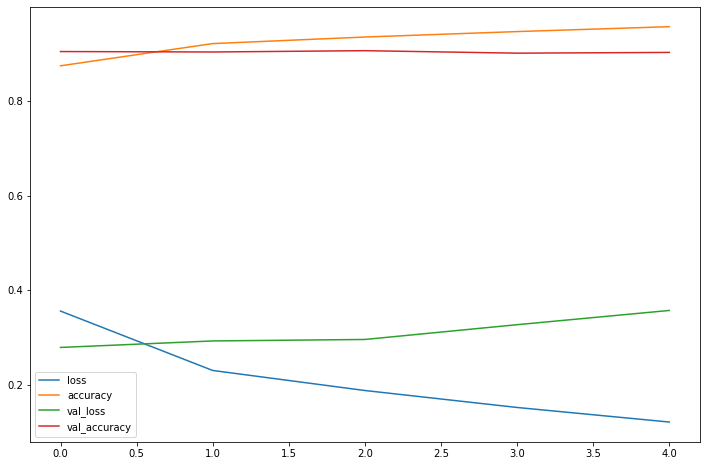

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))